In [2]:
import numpy as np
import sympy as sy
from math import *
from sympy import *

mm=0.001

def yw(w,L,E,I):
    x=S('x')
    return -w/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2)

def yf(f,L,E,I):
    x=S('x')
    return f/(6*E*I)*(x**3-3*L*x**2)

def ym(M,L,E,I):
    return -M/(2*E*I)*x**2

def yf_2pin(f,L,E,I): #L是两端点之间的距离
    return f/(48*E*I)*(4*x**3-3*L**2*x)

def yw_2pin(w,L,E,I): #L是两端点之间的距离
    return -w/(24*E*I)*(x**4-2*L*x**3+L**3*x)

知识重点
---
1. 形公式法  
$y''=\frac{M(x)}{EI}$  
2. 叠加法

题目列表
---
1. (选择题) T1 形变+边界条件
2. (选择题) T2 形变+边界条件
3. (计算题) T3 形变
4. (计算题)
5. (计算题) 
6. (计算题) ⭐
7. (计算题) 简单
8. (计算题) ⭐⭐
9. (计算题) 简单

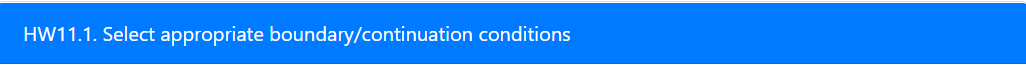

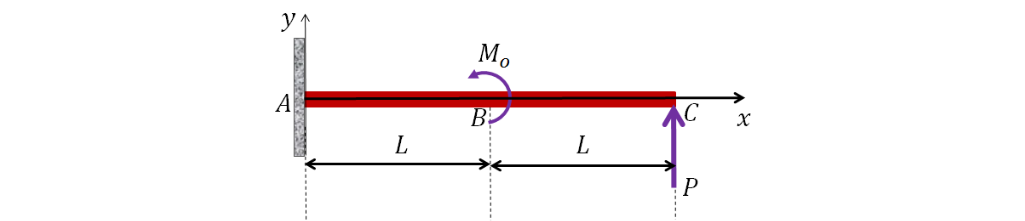

$$
y_1(0)=0
$$

$$
y'_1(0)=0
$$

$$
y_1(L)=y_2(L)
$$

$$
y'_1(L)=y'_2(L)
$$


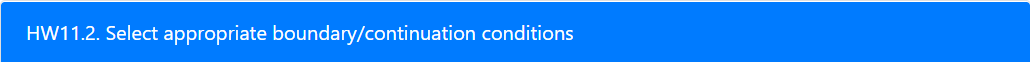

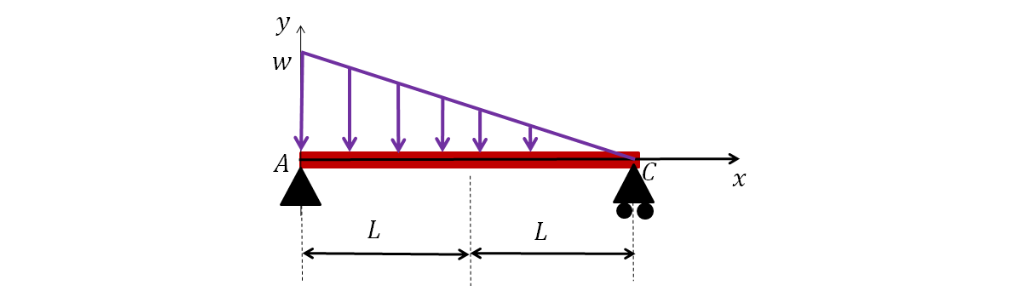

$$
y(0)=y(L)=0
$$

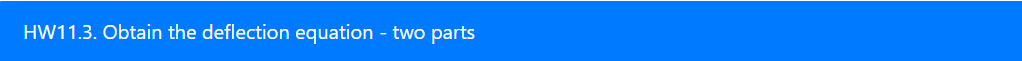

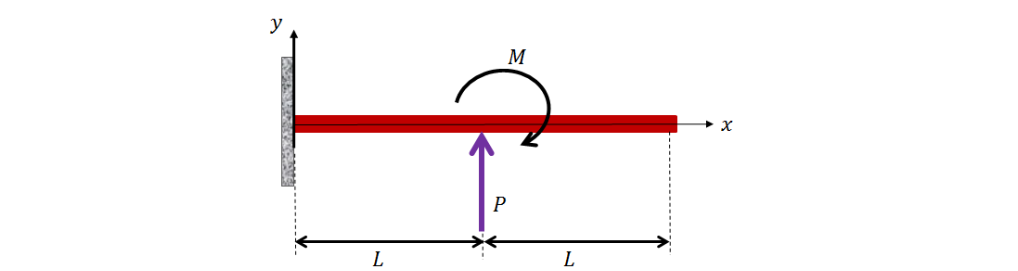

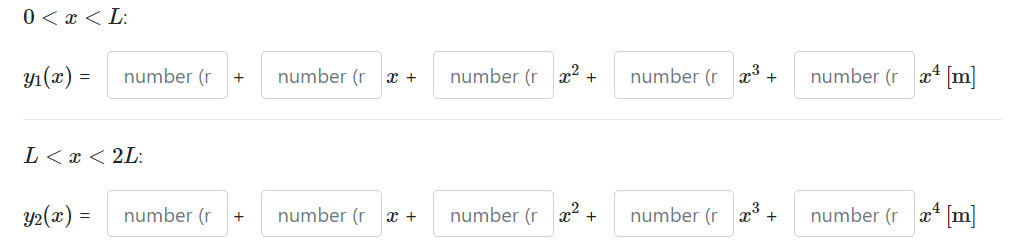

In [2]:
P = 10 # kN
M = 8 # kN.m
L = 8 # m
E = 202 # GPa
Iz = 0.000046 # m^4
#################复制部分
M*=1000 #注意M的方向
P*=1000
E*=1e9
x=sy.S('x')
#################单位转化


#叠加公式法
y1=-M/(2*E*Iz)*x**2    -    P/(6*E*Iz)*(x**3-3*L*x**2)

h=y1.subs(x,L)           #初值
k=diff(y1,x,1).subs(x,L) #斜率
y2=k*(x-L)+h



sy.init_printing()
y1,y2

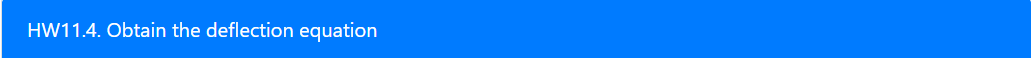

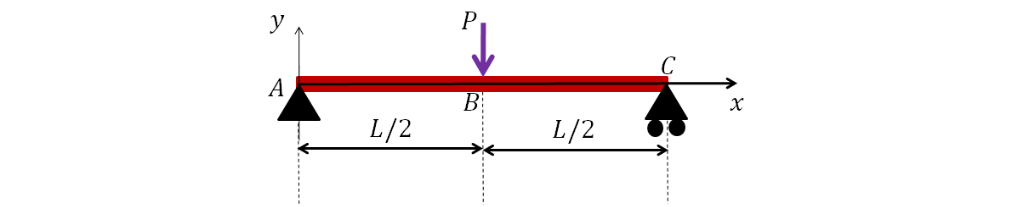

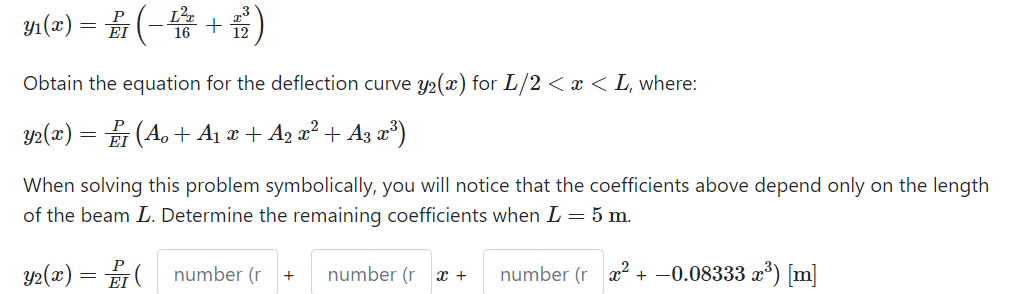

本题左和右的形变是对称的
---

In [3]:
x,A0,A1,A2,A3=sy.S('x,A0,A1,A2,A3')
E=1
P=1
I=1

L=9

y1=P/(E*I)*(-L**2*x/16+x**3/12)
y2=P/(E*I)*(A0+A1*x+A2*x**2+A3*x**3)

y2=y1.subs(x,L-x)
sy.expand(y2)

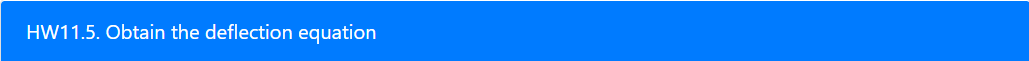

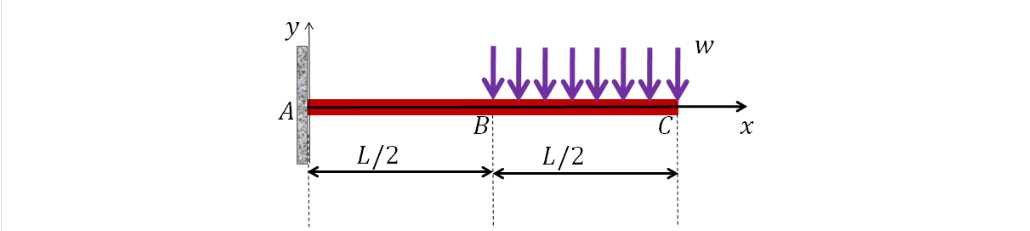

In [4]:
from sympy import *

x,A0,A1,A2,A3,A4=sy.S('x,A0,A1,A2,A3,A4')
E=1
P=1
I=1
w=1

L=9

y1=w/(E*I)*(-3*L**2*x**2/16+L*x**3/12)
y2=w/(E*I)*(A0+A1*x+A2*x**2+A3*x**3+A4*x**4)


#边界条件
equ1=(diff(y1,x,0)).subs(x,0.5*L)-(diff(y2,x,0)).subs(x,0.5*L)
equ2=(diff(y1,x,1)).subs(x,0.5*L)-(diff(y2,x,1)).subs(x,0.5*L)
equ3=(diff(y1,x,2)).subs(x,0.5*L)-(diff(y2,x,2)).subs(x,0.5*L)
equ4=(diff(y1,x,3)).subs(x,0.5*L)-(diff(y2,x,3)).subs(x,0.5*L)
equ5=A4+0.04167 #题目给定

sy.solve([equ1,equ2,equ3,equ4,equ5],[A0,A1,A2,A3,A4])

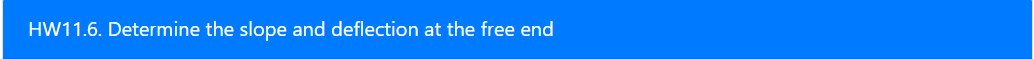

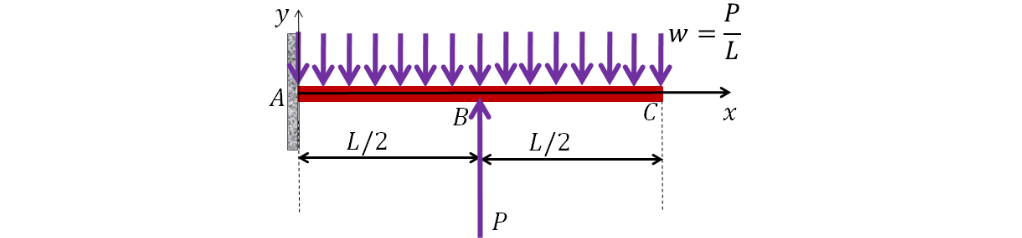

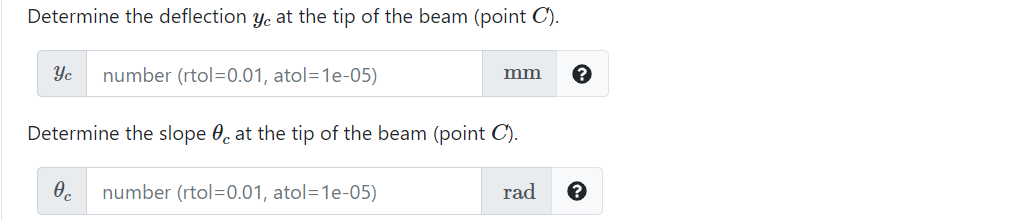

In [ ]:
P = 13 # kN
L = 6 # m
E = 216 # GPa
Iz = 0.000060 # m^4
########################复制部分
P*=1000
E*=1e9
########################单位转化
x=sy.S('x')

#对于0→L/2
w=P/L
y_part1_1=-w/(24*E*Iz)*(x**4-4*L*x**3+6*L**2*x**2)
y_part2_1=-P/(6*E*Iz)*(x**3-3*(L/2)*x**2)                 #注意这里P是朝上的，所以要加负号，以及L/2❗❗❗❗❗❗❗❗❗
y1=y_part2_1


#限制条件
h=diff(y1,x,0).subs(x,0.5*L)
k=diff(y1,x,1).subs(x,0.5*L)

#对于L/2→L
y_part1_2=-w/(24*E*Iz)*(x**4-4*L*x**3+6*L**2*x**2)
y_part2_2=h+k*(x-L/2)
y2=y_part1_2+y_part2_2

yc=y2.subs(x,L)/mm 
thetac=sy.atan(diff(y2,x,1).subs(x,L))

yc,thetac

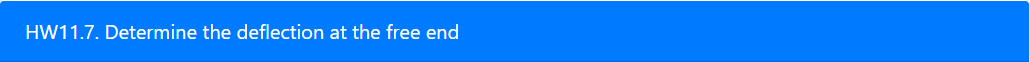

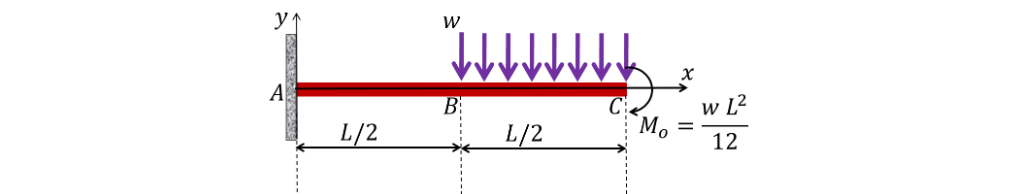

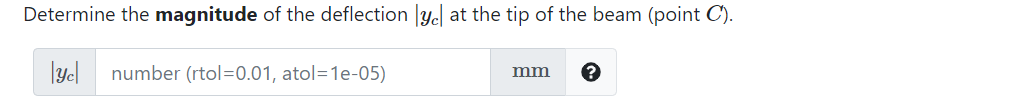

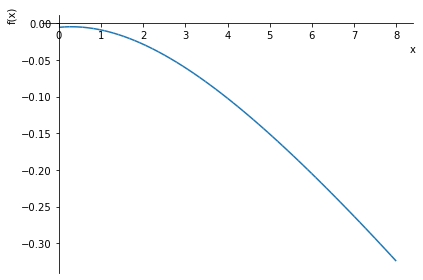

In [6]:
w = 6 # kN/m
L = 8 # m
E = 201 # GPa
Iz = 0.000056 # m^4
########################复制部分
w*=1000
E*=1e9
M=w*L**2/12
########################单位转化
w1=-w
w2=w

y1_1=-w1/(24*E*Iz)*(x**4-4*(L/2)*x**3+6*(L/2)**2*x**2)
h=diff(y1_1,x,0).subs(x,L/2)
k=diff(y1_1,x,1).subs(x,L/2)
y1_2=h+k*(x-L/2)

y2=-w2/(24*E*Iz)*(x**4-4*L*x**3+6*L**2*x**2)
y3=-M/(2*E*Iz)*x**2

y=y1_2+y2+y3
yc=y.subs(x,L)
sy.plotting.plot(y,(x,0,L))
abs(yc/mm)

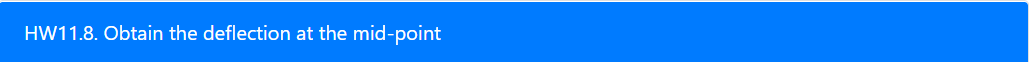

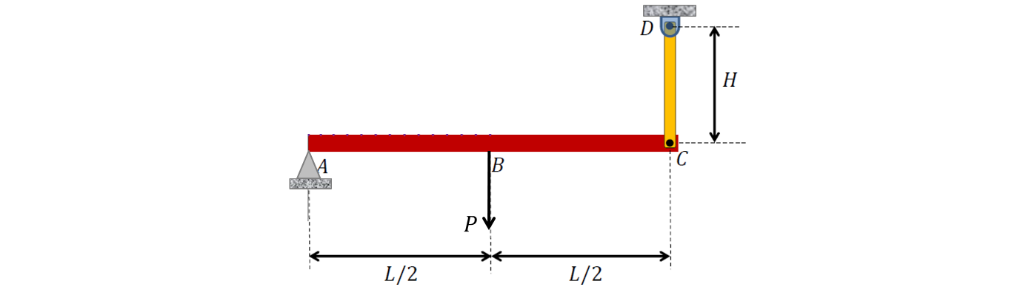

**解题思路：**  
---
&nbsp;&nbsp;&nbsp;叠加 = 2pin情况+$C$点位移的一半
---

In [25]:
P = 3 # kN
E = 177 # GPa
A = 191 # mm^2
L = 8 # m
H = 4 # m
Iz = 42000000 # mm^4
######################复制部分
P*=1000;E*=1e9;A*=mm**2;I=Iz*mm**4
######################单位转化
k=E*A/H

#①计算FC→C点位移
FC=P*0.5*L/L
delta_C=-FC/k

#②计算2pin类型位移
P1=P
L1=L
y1=yf_2pin(P1,L1,E,I)

(y1.subs(x,0.5*L)+0.5*delta_C)/mm

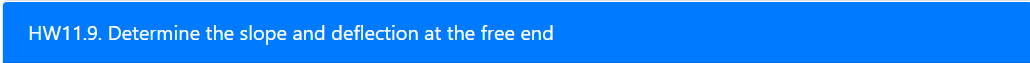

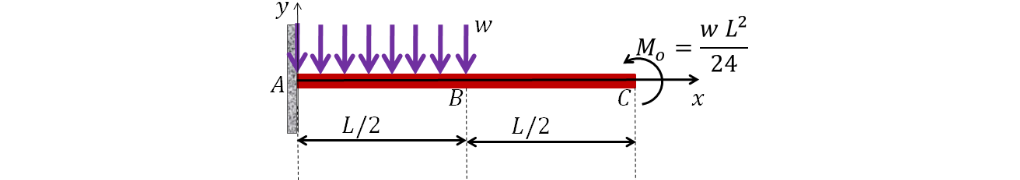

In [ ]:
from sympy import *

w = 6 # kN/m
L = 6 # m
E = 169 # GPa
Iz = 0.000050 # m^4
####################复制部分
w*=1000;E*=1e9;I=Iz;M=w*L**2/24
####################单位转化
#w产生的
x=S('x')
w1=w
L1=0.5*L
y11=yw(w1,L1,E,I)
h=diff(y11,x,0).subs(x,L1)
k=diff(y11,x,1).subs(x,L1)
y12=h+k*(x-L1)
y1=y12

#M产生的
M2=-M
L2=L
y2=ym(M2,L2,E,I)

y=y1+y2

delta=diff(y,x,0).subs(x,L)
theta=diff(y,x,1).subs(x,L)

delta/mm,theta

(2.39644970414201, 0.00319526627218935)